3.9653504
0.03510967
0.025962777
0.022687636
0.020213014
0.015466385
0.010917277
0.0071261763
0.0052622086
0.004021242
0.0031372556
0.002417256
0.0021090303
0.0019966085
0.001893985
0.0018466669
0.0018163407
0.0017909983
0.0017665201
0.0017442295
0.0017270269
0.0017145425
0.001704487
0.0016950562
0.0016849913
0.0016736697
0.0016614092
0.001648612
0.0016355258
0.0016228238
0.0016107836
0.0015993359
0.0015856128
0.0015649864
0.0015306934
0.0014624349
0.0013051943
0.0011147979
0.0009923815
0.0009225671
0.0008688367
0.0008222121
0.000788226
0.00076395227
0.00074940023
0.00074003113
0.0007338317
0.00072959217
0.0007266043
0.0007244076
0.0007227515
0.0007214205
0.00072047184
0.0007217728
0.0007186415
0.0007179448
0.0007173174
0.0007167768
0.00071624113
0.00071577216
0.00071533513
0.0007149272
0.00071455113
0.0007142903
0.0007138532
0.0007135751
0.0007132348
0.0007129533
0.00071268325
0.0007124317
0.0007123186
0.0007119572
0.00071173994
0.0007115336
0.0007113396
0.00071114814
0.00071096775
0.

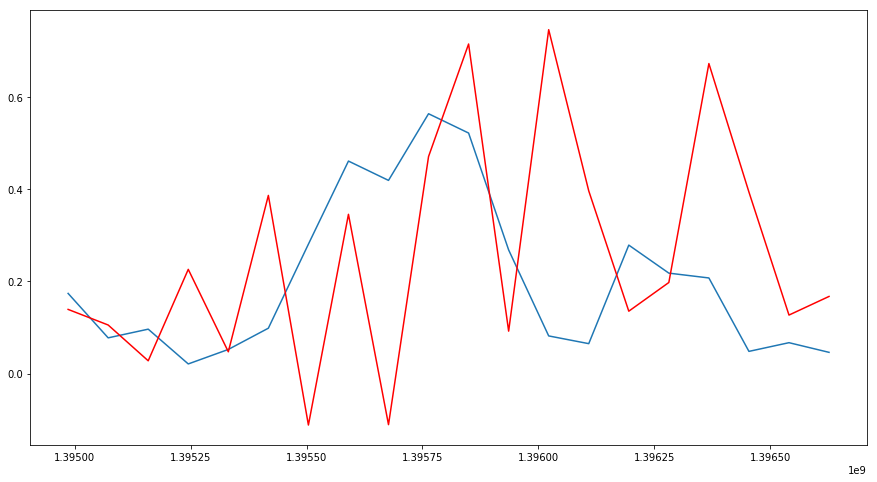

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


############################可修改参数##########################

days = 1000               #喂入训练的天数
hidden_yuan = 5         #隐藏层神经元数量
act_fun = tf.nn.tanh     #使用的激励函数
n =20
###############################################################






def add_layer(inputs, in_size, out_size, activation_function=None):  # 一层神经网络
    W = tf.Variable(tf.random_normal([in_size, out_size]))  # 权值
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)  # 偏值
    Wx_plus_b = tf.matmul(inputs, W) + biases  # 未激活的函数 y = W x + b 未被激活函数弯曲
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


# x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
# noise = np.random.normal(0, 0.1, x_data.shape)
# y_data = np.square(x_data) - 3 + noise
# print(x_data)

import pandas as pd
air = pd.read_csv('pm25_n.csv')

# x_data = air['timestamp'].head(50).values[:, np.newaxis]
# df = air['pm25'].head(50)
# y_nor = (df - df.min()) / (df.max() - df.min())
# y_data=y_nor.values[:, np.newaxis]

x_data = pd.DataFrame(air,columns=['x1','x2','x3','x4','x5']).head(days).values
y_data = air['pm25'].head(days).values[:, np.newaxis]
time = air['timestamp'].head(days).values[:, np.newaxis]
# print(time)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(time,y_data)
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
ax.set_title('模型对'+str(days)+'天训练数据的拟合，隐藏神经元个数：'+str(hidden_yuan))
plt.ion()
# plt.show()



xs = tf.placeholder(tf.float32, [None, 5])  # 这里要改维度，这两个就是先把位置空出来，让变量可以带进去
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 5, hidden_yuan, activation_function=act_fun)
l2 = add_layer(l1, hidden_yuan, hidden_yuan, activation_function=act_fun)# 这里要改维度
predition = add_layer(l2, hidden_yuan, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - predition), reduction_indices=[1]))  # 这个是误差（均方差），通过均方差反向传输
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)  # 通过这个优化器减小误差，注意学习效率（跨步）不要太大

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # 所有变量初始化
    for i in range(160000):#训练两万次
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 2000 == 0:
            # try:
            #     ax.lines.remove(lines[0])
            # except:
            #     pass
            # predition_value = sess.run(predition,feed_dict={xs: x_data})
            # lines = ax.plot(x_data,predition_value,'r-',lw=5)
            # plt.pause(0.1)
            print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
    #########代入模型预测数据部分########
    x_pre_data = pd.DataFrame(air, columns=['x1', 'x2', 'x3', 'x4', 'x5'])[days:days+n].values
    y_pre_data = air['pm25'][days:days+n].values[:, np.newaxis]
    time_pre = air['timestamp'][days:days+n].values[:, np.newaxis]

    pre_pic = plt.figure()
    pre_real = pre_pic.add_subplot(1, 1, 1)
    pre_real.set_xlabel('Date')
    pre_real.set_ylabel('PM2.5')
    pre_real.set_title('模型训练后对后'+str(n)+'天的预测,Loss:'+str(sess.run(loss, feed_dict={xs: x_pre_data, ys: y_pre_data})))
    pre_real.plot(time_pre, y_pre_data)

    predition_pre_value = sess.run(predition, feed_dict={xs: x_pre_data})
    pre_real.plot(time_pre, predition_pre_value, 'r-')
    #######################################
    predition_value = sess.run(predition, feed_dict={xs: x_data})
    lines = ax.plot(time, predition_value, 'r-')
    plt.pause(0.1)

# plt.show()